<a href="https://colab.research.google.com/github/Jdzubina/Java-Programming/blob/main/Colab_Notebook_3_JosephDzubina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression**

Linear regression is a machine learning tool used to predict a continuous output variable based on one or more input features. It is a supervised learning task that aims to find a function that relates an input (independent variable) to an output (dependent variable). This technique helps us understand how changes in the independent variable affect the dependent variable.










**Code Sample**

In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Importing all necessary libraries including TensorFlow for deep learning,
# NumPy for numerical operations, pandas for data manipulation, matplotlib for plotting,
# and scikit-learn for data preprocessing and evaluation metrics.


In [ ]:
 # The data file is loaded and analyzed

filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')
df.describe()

# Loading the dataset from an Excel file. This dataset contains features like
# ambient temperature (AT), exhaust vacuum (V), ambient pressure (AP), and relative humidity (RH)
# which will be used to predict the electrical power output (PE).


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Preprocess/# Normalize the data

X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_test, Y_train, y_test = \
 train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [ ]:
# Define the linear regression model
class LinearRegressor:
    def __init__(self, d, lr=0.001):
        # Placeholders for input-output training data
        self.X = tf.placeholder(tf.float32, shape=[None, d], name='input')
        self.Y = tf.placeholder(tf.float32, name='output')

        # Variables for weight and bias
        self.b = tf.Variable(0.0, dtype=tf.float32)
        self.W = tf.Variable(tf.random_normal([d, 1]), dtype=tf.float32)

        # Linear regression model
        self.F = self.function(self.X)

        # At first I was getting an "NameError: name 'self' is not defined" error
        # because I added the code for the linear regression model above without the code below.
        # The output was successful after completing the entire code sequence.

        # Loss function
        self.loss = tf.reduce_mean(tf.square(self.Y - self.F), name='LSE')

        # # Gradient Descent with learning
        optimizer = tf.train.GradientDescentOptimizer(lr)
        self.optimize = optimizer.minimize(self.loss)

        # Initializing variables
        init_op = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init_op)

        # one thing that is helping here is breaking up the code chunks to make them more readable.
        # It helps me diagnose errors by focusing on specific code blocks.

In [ ]:
def function(self, X):
    return tf.matmul(X, self.W) + self.b

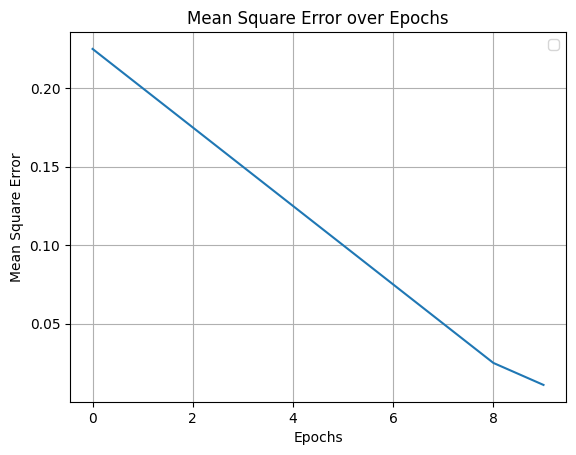

In [ ]:
def fit(self, X, Y, epochs=500):
        total = []
        for i in range(epochs):
            _, l = self.sess.run([self.optimize, self.loss], feed_dict={self.X: X, self.Y: Y})
            total.append(l)
            if i % 100 == 0:
                print(f'Epoch {i}/{epochs}: Loss {l}')
            return total

            # I'm not sure what's happening here exactly but there was a big issue with indenting and
            # I had to do a lot of trial and error to line the code up. It seems that it has to align
            # with the code block above

            def predict(self, X):
                return self.sess.run(self.function(X), feed_dict={self.X: X})

            def get_weights(self):
                return self.sess.run([self.W, self.b])

            N, d = X_train.shape
            model = LinearRegressor(d)
            loss = model.fit(X_train, Y_train, 20000) #Epochs = 20000


import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# IPython Development Team. (n.d.). IPython.core.interactiveshell.InteractiveShell.enable_matplotlib.
# IPython 8.12.0 documentation. Retrieved
# from https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.interactiveshell.html#IPython.core.interactiveshell.InteractiveShell.enable_matplotlib

# The graph I created shows the performance of the linear regressor

# X-axis (bottom line): This shows the number of times (or "epochs")
# the model has practiced.
# Each practice session is a chance for the program to learn and get better.

# Y-axis (side line): This shows how much error the program makes in its predictions
# Error means how far off our predictions are from the actual values.
# Lower error means better predictions.

# The Line on the Graph shows how the error changes as the program practices more.
# When the program starts, the error is high (around 0.225).
# This means the predictions were not very accurate at first.
# As the program keeps practicing the error goes down.
# This means the predictions are getting better and more accurate.

**Describe what it looks like when a new dataset is applied**

In [ ]:
# Making new data to apply to the model
new_data = pd.DataFrame({
    'AT': [25, 30.0, 35.0, 20.0, 15.0],  # This would respresent Ambient Temperature
    'V': [60.0, 55.0, 70.0, 65.0, 50.0],   # This would respresent Exhaust Vacuum
    'AP': [1010.0, 1005.0, 1020.0, 1015.0, 1000.0], # his would respresent Ambient Pressure
    'RH': [50.0, 45.0, 55.0, 60.0, 40.0]   # This would respresent Relative Humidity
})

# Reference: pandas. (n.d.). pandas.DataFrame. pandas documentation.
# Retrieved from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

# Normalize the new data
new_data_normalized = scaler.transform(new_data)

# Making predictions with the existing model
new_predictions = model.predict(np.float32(new_data))

# Reference: Sharp Sight. (2021, June 10).
# How to use the predict method in scikit-learn [Blog post].
# Sharp Sight. https://www.sharpsightlabs.com/blog/sklearn-predict/

# Print the predictions
print("Predictions on new data:", new_predictions, "These are new power output predictions based on ambient temp, exhaust vacuum, ambient pressure, relative humidity",
      "I don't know why they are negative")

Predictions on new data: [[-1551.4429]
 [-1542.206 ]
 [-1582.7926]
 [-1564.9441]
 [-1515.8287]] These are new power output predictions based on ambient temp, exhaust vacuum, ambient pressure, relative humidity I don't know why they are negative


**Use Cases**

It can be applied to real world use cases to predict future outcomes based on past data points. For example it could be used to predict a professionals salary based on years of experience. With a dataset of information about employees, including their years of experience (independent variable, x) and their corresponding salaries (dependent variable, y). A model that predicts an employee's salary based on their years of experience could be created with linear regression.


**My Experience Using This Tool**

Working on predicting electrical power output using regression has been a challenging experience. Initially, implementing the linear regression model using TensorFlow was straightforward, but ensuring accurate predictions required a lot of trial and error. Normalizing the data so that it was consistent was a new concept to me. I got an unexpected output for negative predictions and I'm not sure why.

**Classification**

Classification is a type of supervised learning in machine learning where the goal is to assign input data to one of several predefined categories. In this context, classification means predicting a label or category for a given piece of data based on its features.

Logistic regression is a type of statistical method used for binary classification, which means it helps to predict one of two possible outcomes

In [ ]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Enabling inlining plotting
%matplotlib inline

In [ ]:
# Reading the wine quality data

filename = 'winequality-red.csv' # Path to file
df = pd.read_csv(filename, sep=';') #read CSV file

print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
# Preprocessing the data the data

# Separate input features and target quality
X, Y = df[columns[0:-1]], df[columns[-1]]

# Normalize the input features
scaler = MinMaxScaler() # Initialize the scaler w/ the scikit-learn module
X_new = scaler.fit_transform(X)

# Categorize the target variable into three classes
# Here I created three categories: bad, ok, good

Y.loc[(Y<3)] = 3 # Bad quality
Y.loc[(Y<6.5) & (Y>=3)] = 2 # Ok quality
Y.loc[(Y>=6.5)] = 1 # Good quality
Y_new = pd.get_dummies(Y)  # One-hot encode the target variable


<ipython-input-30-7c6b18862d64>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[(Y<3)] = 3 # Bad quality
<ipython-input-30-7c6b18862d64>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[(Y<6.5) & (Y>=3)] = 2 # Ok quality
<ipython-input-30-7c6b18862d64>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[(Y>=6.5)] = 1 # Good quality


In [ ]:
# Split the data into training and testing sets

X_train, X_test, Y_train, y_test = \
train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [ ]:
# I imported the tensorflow v1 and disabled v2 because the code in the textbook is based on v1
# and Collabs is using tensorflow v2. I kept on getting an error saying
# "AttributeError: module 'tensorflow' has no attribute 'placeholder'"
# after a couple of Google's I figured I could revert it back to v1 to keep the code
# functional as it was in the textbook

# reference: Stack Overflow. (n.d.). How switch tensorflow versions between 2.0 and 1.x?
# Retrieved from
# https://stackoverflow.com/questions/55681801/how-switch-tensorflow-versions-between-2-0-and-1-x

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Define the Logistic Regressor class
class LogisticRegressor:
    def __init__(self, d, n, lr=0.001):
        # Placeholders for input-output training data
        self.X = tf.placeholder(tf.float32, shape=[None, d], name='input')
        self.Y = tf.placeholder(tf.float32, name='output')

        # Variables for weights and biases
        self.b = tf.Variable(tf.zeros(n), dtype=tf.float32)
        self.W = tf.Variable(tf.random_normal([d, n]), dtype=tf.float32)

        # Logistic regression model
        h = tf.matmul(self.X, self.W) + self.b
        self.Ypred = tf.nn.sigmoid(h)

        # Loss function
        self.loss = tf.reduce_mean(-tf.reduce_sum(self.Y * tf.log(self.Ypred), reduction_indices=1), name='cross-entropy-loss')

        # Optimizer for minimizing loss using gradient descent
        # Gradient Descent with learning
        # rate of 0.05 to minimize loss
        optimizer = tf.train.GradientDescentOptimizer(lr)
        self.optimize = optimizer.minimize(self.loss)

        # Initializing variables
        init_op = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init_op)

    def fit(self, X, Y, epochs=500):
        total = []
        for i in range(epochs):
            _, l = self.sess.run([self.optimize, self.loss], feed_dict={self.X: X, self.Y: Y})
            total.append(l)
            if i%1000==0:
               print('Epoch {0}/{1}: Loss {2}'.format(i,epochs,l))
        return total

    def predict(self, X):
        return self.sess.run(self.Ypred, feed_dict={self.X: X})

    def get_weights(self):
        return self.sess.run([self.W, self.b])

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Training the logistic regression model
d = X_train.shape[1]  # Number of input features
n = Y_train.shape[1]  # Number of output categories
model = LogisticRegressor(d, n)
model.fit(X_train, Y_train, epochs=500)  # Train the model

# Predicting on the test data
predictions = model.predict(X_test)
print(predictions)


Epoch 0/500: Loss 0.247296541929245
[[0.81296676]
 [0.82916063]
 [0.7936342 ]
 [0.86125416]
 [0.8983079 ]
 [0.92719483]
 [0.72591513]
 [0.8796304 ]
 [0.8451939 ]
 [0.821289  ]
 [0.81336635]
 [0.873642  ]
 [0.8545541 ]
 [0.88700634]
 [0.7276105 ]
 [0.9163029 ]
 [0.77717716]
 [0.7241766 ]
 [0.8210662 ]
 [0.5864079 ]
 [0.8104374 ]
 [0.79510695]
 [0.79184896]
 [0.751222  ]
 [0.73135865]
 [0.6949802 ]
 [0.8273408 ]
 [0.9132115 ]
 [0.87497616]
 [0.7849242 ]
 [0.79730755]
 [0.84821266]
 [0.7866331 ]
 [0.90830445]
 [0.7186216 ]
 [0.811594  ]
 [0.74500203]
 [0.80749285]
 [0.7070968 ]
 [0.8751192 ]
 [0.74792624]
 [0.8036387 ]
 [0.8580677 ]
 [0.7404478 ]
 [0.9034046 ]
 [0.86789215]
 [0.8797603 ]
 [0.8702314 ]
 [0.679047  ]
 [0.79223436]
 [0.899739  ]
 [0.68487775]
 [0.74327177]
 [0.8540167 ]
 [0.69700724]
 [0.7514545 ]
 [0.84910905]
 [0.85529286]
 [0.8023613 ]
 [0.75864136]
 [0.8002635 ]
 [0.80113125]
 [0.783687  ]
 [0.85158306]
 [0.8243082 ]
 [0.8399898 ]
 [0.8272923 ]
 [0.7706285 ]
 [0.82275176

**Use Cases**

 Classification can be used to determine whether an email is spam or not, or in our case, whether the wine is of good, ok, or bad quality. It could be used in healthcare to predict whether a patient has a certain disease or determining if a customer will buy a product based on their past purchase.

**My Experience Using This Tool**

Using logistic regression for wine classification was insightful but challenging. It's worth noting this is my first time writing this type of code. I had to troubleshoot TensorFlow compatibility issues and try understand the model's probability outputs. After this exercise I did not fully understand what the outputs actually meant, I expected them to be in the range of the parameters I described earlier for "bad, ok, good" but these are decimals and not numbers greater or less than 3 - 6. But I have a feeling I may be able to classify them with human language in the next exercise. These challenges taught me how to adapt code to revert to an earlier TensorFlow version.

**Classification using support vector
machines**

Support Vector Machines (SVM) is a supervised machine learning algorithim used to classify data into different categories.

It can be used to define a clear separation between data points (a hyperplane) into two classes. This separation is called a "maximal margin separator" and the idea is to find a clear line farthest from the training samples provided.

The hyperplane is farthest from the data points in each class - this ensures the least error in classification.

**Code Sample**

In [5]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC # The SVM Classifier from scikit
import seaborn as sns
%matplotlib inline

In [30]:
# Load the dataset
filename = 'winequality-red.csv'
df = pd.read_csv(filename, sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Number of wine samples for each level of quality
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [29]:
# Categorize wine quality into two levels: 'bad' and 'good'
df = pd.read_csv(filename, delimiter=';')
bins = (0, 5.5, 10)
categories = pd.cut(df['quality'], bins, labels = ['bad', 'good'])
df['quality'] = categories

In [31]:
# Preprocessing and splitting data to X and y
X = df.drop(['quality'], axis = 1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
y = df['quality']
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 323)

In [33]:
# Use and train the SVM classifier
classifier = SVC(kernel = 'rbf', random_state = 45)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)

<Axes: >

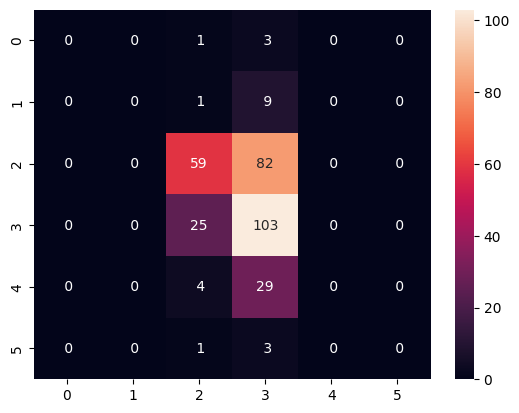

In [39]:
# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [19]:
# Organizes counts into each categories
df['quality'].value_counts()

quality
good    855
ok      734
bad      10
Name: count, dtype: int64

In [35]:
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.50625


**Use Cases**

Support Vector Machines (SVM) can be used to solve a variety of classification problems. For example, in image classification, SVM can be used to identify whether an image contains a cat or a dog. Or handwriting recognition, in which SVM can assist in recognizing handwritten numbers or letters.

**My Experience Using This Tool**

I found that using SVM for wine classification was easier to implement than logistic regression. I appreciated the simplicity of the code, which allowed me to easily organize the data into quality scores and categorize them into 'okay, 'good' and 'bad'. This exercise helped me understand how SVM and data preparation works. Overall, it was a I enjoyed the experience and it helped build my confidence in using machine learning tools.

**Naive Bayes**

Naive Bayes is a simple yet powerful supervised learning algorithm used for classification tasks. It is based on Bayes' Theorem, which provides a way to calculate the probability of a hypothesis given some observed evidence. The "naive" part of the name comes from the assumption that all features in the input data are independent of each other or independent and identically distributed (iid)

**Code Sample**

In [45]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB # The SVM Classifier from scikit
import seaborn as sns
%matplotlib inline

In [51]:
# Load the dataset
filename = 'winequality-red.csv' # Path to the dataset
df = pd.read_csv(filename, sep=';') # Read the CSV file with semicolon separator
# Generate summary of statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
#categorize wine quality in two levels
bins = (0,5.5,10)
categories = pd.cut(df['quality'], bins, labels = ['bad','good'])
df['quality'] = categories

In [54]:
# Preprocessing and splitting data into features (X) and labels (y)
X = df.drop(['quality'], axis=1)
scaler = MinMaxScaler() # Initialize the scaler
X_new = scaler.fit_transform(X) # Normalize the features
y = df['quality']
labelencoder_y = LabelEncoder() # Initialize label encoder
y = labelencoder_y.fit_transform(y)

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=323)

In [56]:
# Initialize and train the Naive Bayes classifier
classifier = GaussianNB() # Use Gaussian Naive Bayes
classifier.fit(X_train, y_train) # Train the model

GaussianNB()

In [58]:
# Organizes counts into each categories
df['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [57]:
#Predicting the Test Set
y_pred = classifier.predict(X_test)

<Axes: >

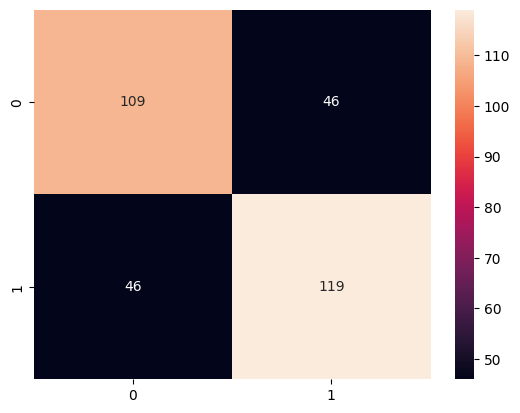

In [61]:
# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [60]:
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.7125


**Use Cases**

Naive Bayes is widely used for text and image classification tasks such as sentiment analysis and categorizing news articles. In wildlife conservation, it helps in classifying animal species captured in camera trap images, distinguishing between different species based on visual patterns and movement data.

Using Naive Bayes for wine classification was relatively straightforward and efficient compared to the previous models. I appreciated the simplicity and speed of the algorithm. Working through this exercise highlighted the effectiveness of Naive Bayes, especially for text classification and other tasks with similar characteristics. Overall, it reinforced the importance of choosing the right algorithm for different classification problems